# **Dasar Pengolahan Citra dengan OpenCV**

## Dasar OpenCV
Pada latihan sebelumnya telah dibahas mengenai bagaimana menggunakan Google Colab sebagai sebuah console interactive Python (iPython) Notebook. Dengan Google Colab, kita dapat membuat sebuah notebook berisi serangkaian perintah dalam bahasa Python untuk menjalankan fungsi tertentu, termasuk pengolahan citra. Pada minggu ini akan dibahas secara khusus mengenai penggunaan OpenCV untuk melakukan pengolahan citra sederhana.

Untuk latihan ini, pelajari kembali mengenai cara untuk mengunggah dan menggunakan berkas (misalnya file foto) pada Google Colab. Cara lain yang dapat dilakukan adalah dengan menggunakan fungsi *upload file* pada Google Colab. Untuk latihan ini, unggah file '**orange.jpg**' dari link berikut:


https://drive.google.com/uc?id=1kc8QA4GIHqaQusFlcGd91cUNnb3nr7GU




In [0]:
# upload file yang sudah diunduh
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Untuk menggunakan OpenCV, kita akan memanggil fungsi **cv2** dari library OpenCV versi 4 yang sudah tersedia pada Google Colab. 

Khusus untuk penggunaan OpenCV di Google Colab, terdapat satu fungsi yang memerlukan patch atau perbaikan, yaitu ``` cv2.imshow()```. Fungsi ini digunakan untuk menampilkan gambar pada OpenCV. Di Google Colab, fungsi ini digantikan dengan baris perintah berikut:

``` from google.colab.patches import cv2_imshow ```

selanjutnya fungsi ```cv2.imshow()``` digantikan dengan fungsi ```cv2_imshow()```.

Untuk mencoba, jalankan baris perintah berikut:


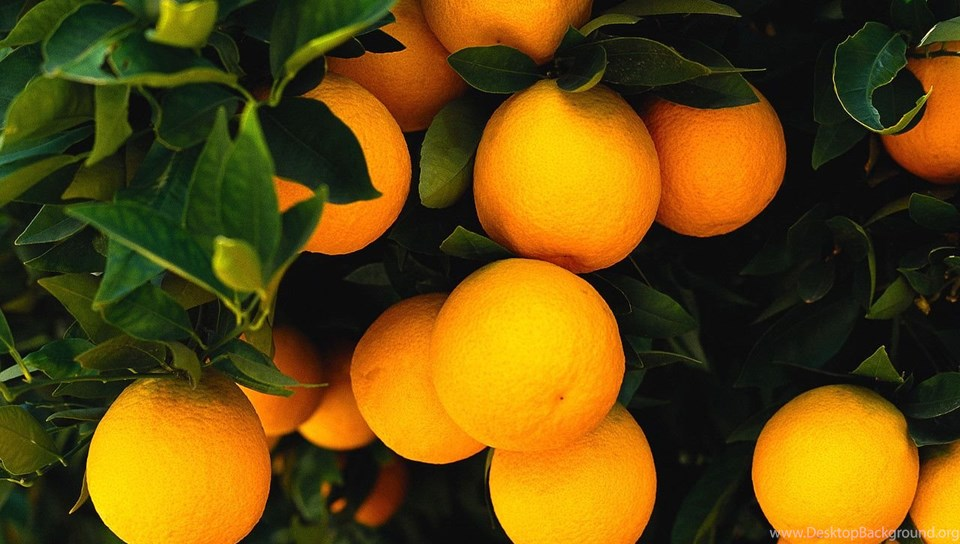

<class 'numpy.ndarray'>


In [0]:
# memanggil library opencv
import cv2

# memanggil fungsi google colab untuk perbaikan cv2.imshow
from google.colab.patches import cv2_imshow

# menyimpan gambar dengan fungsi imread dari OpenCV
img = cv2.imread('orange.jpg')  # sesuaikan dengan nama file yang diunggah pada cell sebelumnya

# menampilkan gambar dengan fungsi cv2_imshow
cv2_imshow(img)

# lihat tipe data img. disimpan sebagai apa?
print(type(img))





**Keterangan:**

*import*	adalah fungsi Python untuk memanggil modul di luar fungsi dasar yang disediakan

*cv2*	adalah nama modul Python yang digunakan untuk memanggil fungsi-fungsi OpenCV

*numpy*	modul Python untuk pengolahan matriks (ingat bahwa citra pada OpenCV dianggap sebagai matrix)
matplotlib	modul Python untuk melakukan fungsi plotting

*cv2.imread*	perintah yang digunakan pada modul cv2 untuk memanggil citra

*cv2_imshow*	perintah yang digunakan pada modul cv2 untuk menampilkan citra. Argumen yang diperlukan adalah nama  citra yang dipanggil

Perintah di atas menggunakan *cv2.imread* untuk memanggil citra. Pada script di atas, 

```img = cv2.imread('orange.jpg')```

menunjukkan bahwa citra ‘orange.jpg’ disimpan pada variable bernama ```img```.

Selain fungsi **imshow** di atas, dapat digunakan juga Matplotlib untuk menampilkan gambar. Kode yang digunakan adalah ```plt.imshow()``` dengan terlebih dulu memanggil fungsi ```plt``` dari library Matplotlib:


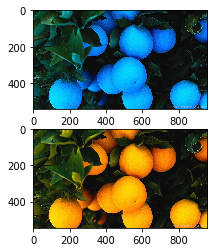

In [0]:
# memanggil fungsi plt dari matplotlib
from matplotlib import pyplot as plt

# membuat sebuah variabel kosong 'fig' 
fig = plt.figure()
fig.add_subplot(211)
# subplot (jumlah baris, jumlah kolom, urutan)

# menampilkan gambar dengan fungsi plt
plt.imshow(img)

# plotting gambar
fig.add_subplot(212)
# subplot (jumlah baris, jumlah kolom, urutan)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)


plt.show() #untuk menampilkan plot


> **Pertanyaan**: Mengapa warnanya berubah jadi biru?

Beberapa perintah lain yang dapat digunakan untuk mengakses properti citra ```img``` adalah:

In [0]:
print(img.shape) #menampilkan resolusi
print(img.size) #menampilkan ukuran data pada media penyimpan
print(img.dtype) #image datatype (kedalaman bit) 


(544, 960, 3)
1566720
uint8


Demikian pula operasi-operasi matriks lainnya dapat diterapkan pada citra yang sudah dipanggil. Untuk detilnya silahkan merujuk Dokumentasi OpenCV


## Ekstraksi Band

Sebuah citra dapat dipecah pada band penyusunnya dengan menggunakan perintah ```cv2.split()```.

In [0]:
# Band blue, green dan red masng-masing disimpan pada variabel b,g,r
b, g, r = cv2.split(img)

atau bisa juga dengan menggunakan operasi index pada matriks img:

In [0]:
b = img[...,0]  # blue channel
g = img[...,1]  # green channel
r = img[...,2]  # red channel


selanjutnya masing-masing band dapat ditampilkan dengan menggunakan ```cv2_imshow``` atau ```plt.imshow```:

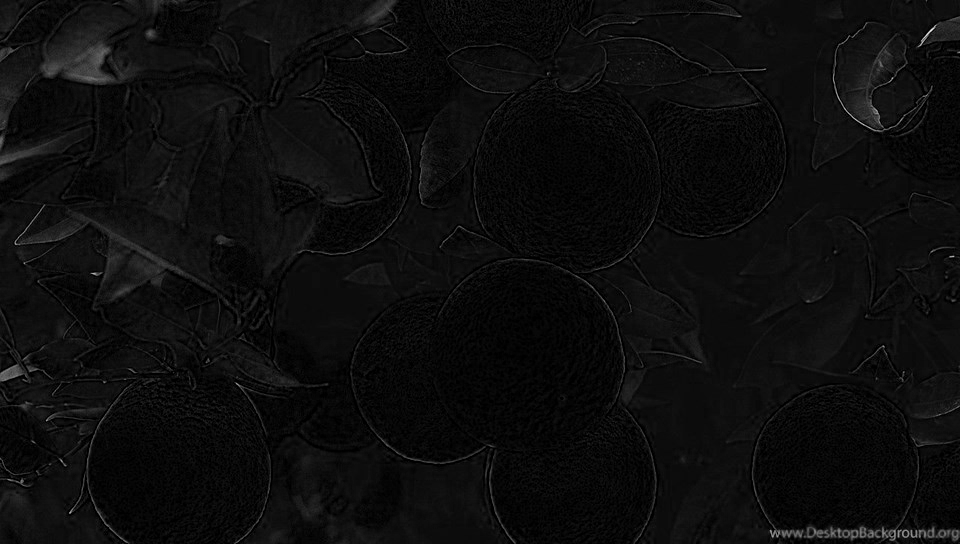

In [0]:
cv2_imshow(b); # menampilkan band biru

Cobalah latihan yang sama dengan menggunakan band lain

## Transformasi Colorspace

Citra pada OpenCV disimpan dalam susunan BGR (*Blue, Green, Red*). Adakalanya untuk berbagai keperluan perlu dilakukan transformasi colorspace BGR menjadi format lain, misalnya HSV (*Hue Saturation Value*). Penggunaan Colorspace HSV bertujuan untuk mendekati bagaimana cara mata manusia mengenali warna. Contoh penggunaannya adalah untuk melakukan ekstraksi objek berdasarkan warna dan kecerahannya.

Fungsi yang digunakan untuk melakukan transformasi adalah ```cv2.cvtColor()```




In [0]:
# konversi bgr dari variable img ke colorspace HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);

Fungsi di atas mentransformasi citra img ke dalam kelas warna HSV menggunakan fungsi COLOR_BGR2HSV. Untuk fungsi transformasi lain silahkan merujuk dokumentasi OpenCV.
Hasil konversi juga dapat dipecah ke dalam masing-masing band:


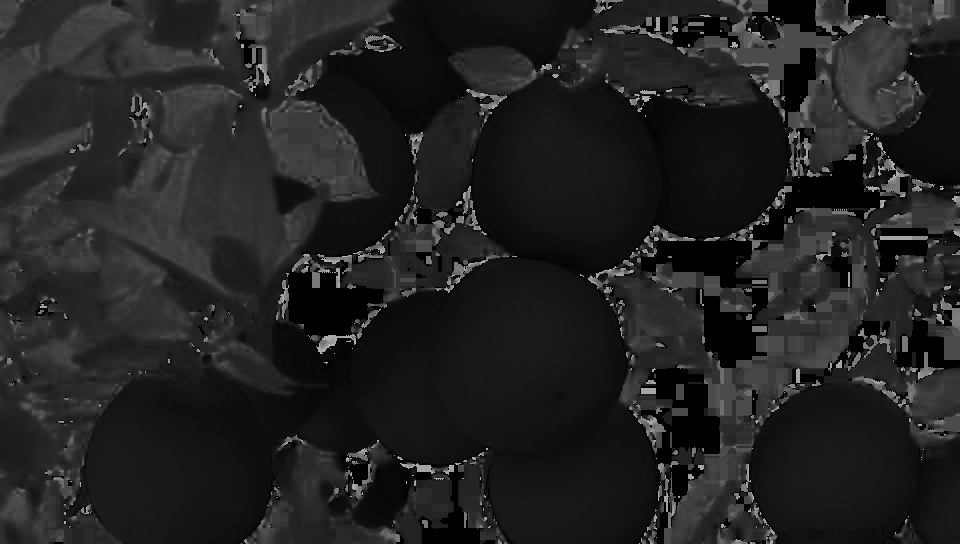

In [0]:
# memisahkan hue, saturation dan value
h, s, v = cv2.split(hsv)

# menampilkan band hue
cv2_imshow(h)

## Menampilkan histogram citra

Histogram dapat ditampilkan dengan menggunakan banyak cara. Fungsi yang dapat digunakan antara lain ```cv2.calcHist()```, ```np.histogram()``` dan ```plt.hist()```.

Adapun parameter untuk fungsi cv2.calcHist() adalah sebagai berikut:

```cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])```

* images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
* channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For * color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. 
* histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* ranges : this is our RANGE. Normally, it is [0,256].

(sumber: https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html)


Contoh kode untuk memanggil histogram:


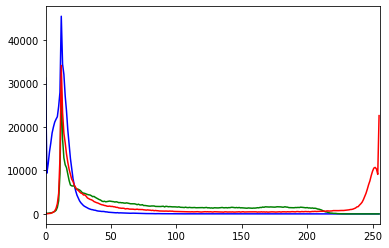

In [0]:
# memanggil library yang dibutuhkan
import cv2
import numpy as np
from matplotlib import pyplot as plt

# jika file baymax.jpg yang digunakan, hilangkan tanda komentar
# img = cv2.imread(‘Baymax.jpg')

color = ('b','g','r')
for i,col in enumerate(color):
  histr = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.show()




Pada fungsi di atas, ```cv2.calcHist()``` digunakan untuk menghitung histogram, sedangkan ```plt.plot()``` digunakan untuk menampilkan histogram yang telah dihitung. Fungsi for adalah perulangan (loop) pada Python.

Berikut contoh plotting dengan pyplot:

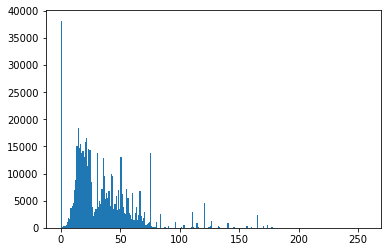

In [0]:
# plotting menggunakan fungsi histogram dari pyplot
# ravel() adalah fungsi numpy untuk mengkonversi array menjadi flat array

# h.ravel() -> menampilkan histogram untuk band Hue (dari variabel pada cell sebelumnya)

plt.hist(h.ravel(),256,[0,256]); 

plt.show()

## Contoh Kasus: Ekstraksi Objek dengan warna

Salah satu contoh penggunaan ekstraksi warna adalah untuk memisahkan objek berdasarkan warnanya. Coba lakukan latihan berikut untuk memahami penggunaannya.

Sebagai referensi, berikut adalah rentang warna pada band Hue:

![Rentang Hue](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/HueScale.svg/360px-HueScale.svg.png)

gambar asal


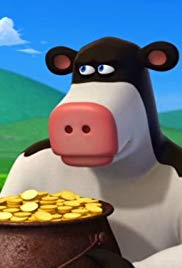

masking warna


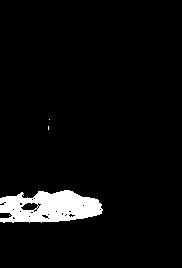

hasil operasi


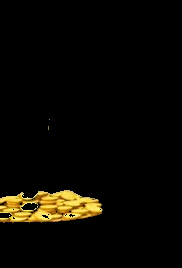

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('barnyard.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);

# slider adalah salah satu fungsi Google Colab
# 3 dan 27 adalah batas warna orange pada band hue
# rubah slider untuk mencoba hasil akhir yang berbeda
batas_bawah = 5 #@param {type:"slider", min:0, max:360, step:1}
batas_atas = 72 #@param {type:"slider", min:0, max:360, step:1}

# definisi batas warna orange. perhatikan variabel batas_bawah dan batas_atas
lower_orange = np.array([batas_bawah,100,100])
upper_orange = np.array([batas_atas,255,255])

# membuat masking untuk mencari objek sesuai batas warna
mask = cv2.inRange(hsv, lower_orange, upper_orange)

# Operasi Bitwise-AND 
res = cv2.bitwise_and(img, img, mask=mask)

# cetak hasil ke layar
print("gambar asal")
cv2_imshow(img);

print("masking warna")
cv2_imshow(mask)

print("hasil operasi")
cv2_imshow(res)




Untuk mendapatkan kelas warna BGR ke HSV, kita dapat menggunakan fungsi konversi sederhana. Misalnya dengan menggunakan fungsi berikut:


In [0]:
# warna hijau (RGB green = 0, 255, 0)
ijo = np.uint8([[[0,255,0 ]]])

# konversi ke HSV
hsv_ijo = cv2.cvtColor(ijo,cv2.COLOR_BGR2HSV)
print(hsv_ijo)

[[[ 60 255 255]]]


Warna hijau pada kelas BGR didefinisikan sebagai [0 255 0]. Fungsi tersebut memperoleh padanan untuk warna hijau tersebut di kelas HSV adalah [60 255 255]. Untuk menentukan batas atas dan batas bawah dapat digunakan rumus [H-10, 100,100] dan [H+10, 255, 255] atau sesuai dengan kebutuhan.

## **Latihan**

Kerjakan sebagai berikut:
1.	Carilah sembarang gambar (boleh dari internet atau memotret sendiri), kemudian dari gambar tersebut tampilkan dengan Python-OpenCV:
> *	Gambar asli dengan menggunakan cv2_imshow()
> *	Gambar asli dengan menggunakan Matplotlib
2.	Pada gambar no 1, lakukan konversi BGR ke HSV kemudian tampilkan sebagai berikut (boleh menggunakan Matplotlib atau cv2.imshow)
> *	Band Biru dari gambar 
> *	Band Hijau dari gambar 
> *	Band Merah dari gambar 
> *	Tampilkan histogram untuk Band Merah, Hijau dan Biru
> *	Band Hue
> *	Band Saturation
> *	Band Value
> * Histogram untuk band hue, saturation dan value

3.	Cari sembarang gambar (boleh menggunakan gambar untuk no 1 dan 2 atau gambar lain), kemudian lakukan ekstraksi objek sesuai metode yang telah ditunjukkan. Tunjukkan perbandingan gambar asli, masking dan gambar hasil ekstraksi. 
